# Curvature, Divergence, and Curl

In addition to the gradient, we have a number of other tools at our disposal to describe the behavior of a function or vector field about a point. 

The **curvature** tells us how much the tangent of a function changes about a point, in other words, how much it _curves_. 

The **divergence** describes the degree to which vectors point _away_, or to what degree motion _diverges_, from a point in a vector field. 

Like the divergence, the **curl** describes movement in a vector field, but _around_ a point rather than away from it. It describes to what degree vectors _curl_ in a counter-clockwise direction around a point.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter
%matplotlib inline

In [2]:
def plot_function(X, Y, fn, linewidth=0, title=''):
    X, Y = np.meshgrid(X, Y)
    Z = fn(X, Y)
    
    # Create figure.
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

    # Customize the z axis.
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.title(title)

    plt.show()
    

# Curvature

The tangent vector of a function $ S(t) $ is given by the following equation:

$$
T(t) = \frac{S^{(1)}(t)}{\left|\left| S^{(1)}(t) \right|\right|} 
$$

Given the following function:

$$
S(t) = \left[ \begin{array}{c} t \\
                               sin(\pi t) \end{array} \right]
$$

The tangent vector is therefore:

$$
T(t) = \left[ \begin{array}{c} 1 \\
                               \pi cos(\pi t) \end{array} \right]
$$

In [3]:
t = np.arange(0, 5, 0.025)
S = [t, np.sin(np.pi * t)]

tangent = lambda t : (1.0 / np.sqrt(1 + (np.pi * np.cos(np.pi * t))**2), 
                     np.pi * np.cos(np.pi * t) / np.sqrt(1 + (np.pi * np.cos(np.pi * t))**2))
U, V = tangent(t)

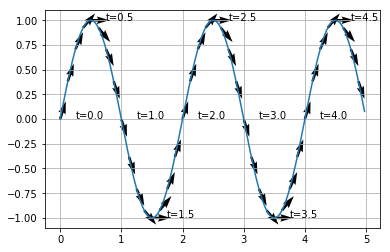

In [4]:
d = 20
plt.plot(S[0], S[1])
for x_i, y_i, t_i in zip(S[0][::d], S[1][::d], t[::d]):
    plt.text(x_i + 0.25, y_i, 't={}'.format(t_i))
    
dv = 5
for x_i, y_i, u_i, v_i in zip(S[0][::dv], S[1][::dv], U[::dv], V[::dv]):
    plt.quiver(x_i, y_i, u_i, v_i)
    
plt.grid()
plt.show()

The rate of change of the tangent of a function with respect to change along the function is called the **curvature**. 

$$
K = \left|\left|\frac {dT}{dt} \right|\right|
= \frac{x^{(1)}(t) y^{(2)}(t) - y^{(1)}(t) x^{(2)}(t)}{((x^{(1)}(t))^2 + (y^{(1)}(t))^2)^\frac{3}{2}}
$$

Therefore, the curvature $ K $ of this function $ S(t) $ is:

$$
K = \frac{-\pi^2 sin(\pi t)}{(1 + (\pi cos(\pi t))^2)^\frac{3}{2}}
$$

If one were to draw a circle with the same rate of curvature as the tangent of a function, the radius $ r $ of that circle would be related to the curvature $ K $ by:

$$
K = \frac{1}{r}
$$

In [5]:
curvature = lambda t : (-np.pi * np.sin(np.pi * t)) / (1 + (np.pi * np.cos(np.pi * t))**2)**(3 / 2.0)

K = curvature(t)

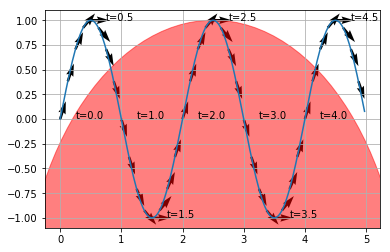

In [6]:
d = 20
fig = plt.plot(S[0], S[1])
for x_i, y_i, t_i in zip(S[0][::d], S[1][::d], t[::d]):
    plt.text(x_i + 0.25, y_i, 't={}'.format(t_i))
    
dv = 5
for x_i, y_i, u_i, v_i in zip(S[0][::dv], S[1][::dv], U[::dv], V[::dv]):
    plt.quiver(x_i, y_i, u_i, v_i)
    
t_i = 100
r = K[t_i]
circle1 = plt.Circle((S[0][t_i], S[1][t_i] + r), r, alpha=0.5, color='red')
plt.gcf().gca().add_artist(circle1)

plt.grid()
plt.show()

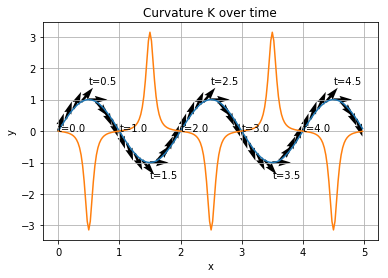

In [7]:
d = 20
fig = plt.plot(S[0], S[1])
for x_i, y_i, t_i in zip(S[0][::d], S[1][::d], t[::d]):
    plt.text(x_i, y_i + y_i / 2, 't={}'.format(t_i))
    
dv = 5
for x_i, y_i, u_i, v_i in zip(S[0][::dv], S[1][::dv], U[::dv], V[::dv]):
    plt.quiver(x_i, y_i, u_i, v_i)
    
plt.plot(t, K)

plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Curvature K over time')
plt.show()

# Divergence

The **divergence** describes the rate at which flow occurs away from a given point. It is a scalar-valued function with vectors as input. The stronger that neighboring vectors point "away" from a point, the greater the value of divergence. Conversely, a point with many vectors pointing towards it will have a large negative divergence.

The divergence is given by:

$$
divergence(f(x, y)) = \nabla \centerdot V(x, y) = \frac{dP}{dx} + \frac{dQ}{dy}
$$

where:

$$
V(x, y) = \left[ \begin{array}{c} P(x, y) \\
                                  Q(x, y) \end{array} \right]
$$

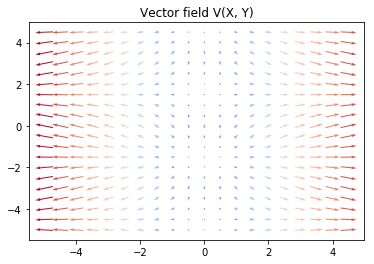

In [8]:
X = np.arange(-5, 5, 0.025)
Y = np.arange(-5, 5, 0.025)
Xm, Ym = np.meshgrid(X, Y)
df = lambda x, y : (2 * x, 2 * np.cos(y))
U, V = df(Xm, Ym)

plt.figure()
plt.title('Vector field V(X, Y)')
Clr = np.hypot(U, V)
d = 20
Q = plt.quiver(Xm[::d, ::d], Ym[::d, ::d], U[::d, ::d], V[::d, ::d],
               Clr[::d, ::d], pivot='mid', cmap=cm.coolwarm)

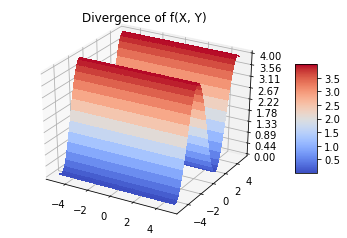

In [9]:
divergence = lambda x, y : 2 - 2 * np.sin(y)

plot_function(X, Y, divergence, title='Divergence of f(X, Y)')

# Curl

The **curl** describes the movement perpendicular, or around, a point rather than into or away from it. Like the divergence, it is scalar-valued and takes a vector field as input. Positive curl values indicate counter-clockwise movement around a point whereas negative curl values indicate clockwise movement.

The curl is given by:

$$
curl(V(x, y)) = \nabla \times V(x, y) = \frac{dQ}{dx} - \frac{dP}{dy}
$$

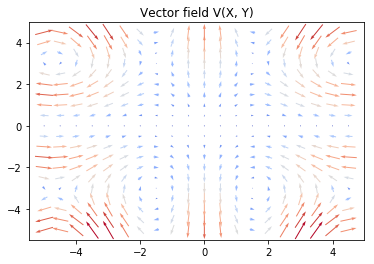

In [10]:
X = np.arange(-5, 5, 0.025)
Y = np.arange(-5, 5, 0.025)
Xm, Ym = np.meshgrid(X, Y)
df = lambda x, y : (x * np.sin(y), y * np.cos(x))
U, V = df(Xm, Ym)

plt.figure()
plt.title('Vector field V(X, Y)')
Clr = np.hypot(U, V)
d = 20
Q = plt.quiver(Xm[::d, ::d], Ym[::d, ::d], U[::d, ::d], V[::d, ::d],
               Clr[::d, ::d], pivot='mid', cmap=cm.coolwarm)

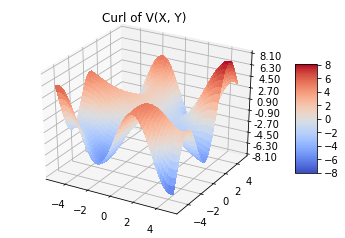

In [11]:
curl = lambda x, y : -y * np.sin(x) - x * np.cos(y)

plot_function(X, Y, curl, title='Curl of V(X, Y)')